# Titanic: Machine Learning from Disaster

In [181]:
# https://www.kaggle.com/c/titanic

In [182]:
import sklearn
import pandas as pd

In [183]:
# Загружаем данные из файлов
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [184]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Предобработка данных

In [185]:
# Заполняем пропуски в данных медианными 
# значениями факторов на обучающей выборке
train_median = train.median()
train_imp = train.fillna(train_median)
test_imp = test.fillna(train_median)

In [186]:
# Бинаризуем категориальные признаки
CATEGORY_COL = ['Sex', 'Pclass', 'Embarked']
train_dummies = pd.get_dummies(train_imp, columns=CATEGORY_COL, drop_first=True)
test_dummies = pd.get_dummies(test_imp, columns=CATEGORY_COL, drop_first=True)

In [187]:
train_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


In [188]:
# Удаляем лишние столбцы
DROP_COL = ['PassengerId', 'Name', 'Ticket', 'Cabin']
TARGET_COL = 'Survived'
X_train = train_dummies.drop(DROP_COL + [TARGET_COL], axis=1)
y_train = train_dummies[TARGET_COL]
X_test = test_dummies.drop(DROP_COL, axis=1)

In [189]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_male      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 32.3 KB


In [190]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_male      418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


## Предсказание моделей для стеккинга

In [191]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def cross_val_predict_proba(estimator, X_train, y_train):
    kfold = KFold(n_splits=4, shuffle=True, random_state=None)
    return cross_val_predict(estimator, X_train, y_train, cv=kfold, method='predict_proba')

In [192]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
RANDOM_STATE = 123

# Диапазон значений числа базовых деревьев
min_estimators = 15
max_estimators = 175

# Выбираем параметр max_depth для RandomForestClassifier

In [193]:
# Устанавливаем аргумент warm_start=True для дообучения модели
ensemble_clfs_max_depth = [
    ("RandomForestClassifier, max_depth=2",
        RandomForestClassifier(warm_start=True, 
                               oob_score=True,
                               max_depth=2,
                               random_state=RANDOM_STATE))
    ,
    ("RandomForestClassifier, max_depth=3",
        RandomForestClassifier(warm_start=True, 
                               oob_score=True,
                               max_depth=3,
                               random_state=RANDOM_STATE))
    ,
    ("RandomForestClassifier, max_depth=4",
        RandomForestClassifier(warm_start=True, 
                               oob_score=True,
                               max_depth=4,
                               random_state=RANDOM_STATE))
    ,
    ("RandomForestClassifier, max_depth=5",
        RandomForestClassifier(warm_start=True, 
                               oob_score=True,
                               max_depth=5,
                               random_state=RANDOM_STATE))
    ,
    ("RandomForestClassifier, max_depth=6",
        RandomForestClassifier(warm_start=True, 
                           oob_score=True,
                           max_depth=6,
                           random_state=RANDOM_STATE))
    ,
    ("RandomForestClassifier, max_depth=7",
        RandomForestClassifier(warm_start=True, 
                           oob_score=True,
                           max_depth=7,
                           random_state=RANDOM_STATE))
]

# Создаем переменную для сохранения оценки качества на каждой итерации
error_rate_max_depth = OrderedDict((label, []) for label, _ in ensemble_clfs_max_depth)

for label, clf in ensemble_clfs_max_depth:
    for i in range(min_estimators, max_estimators + 1):
        # Задаем число 
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)
        oob_error = 1 - clf.oob_score_
        error_rate_max_depth[label].append((i, oob_error))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

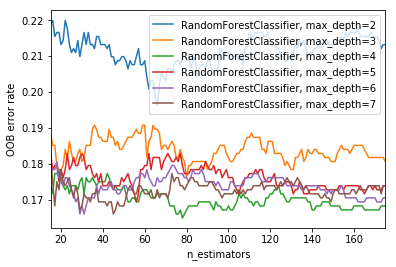

In [194]:
# Выводим зависимость качества от числа базовых моделей
for label, clf_err in error_rate_max_depth.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Оптимальное знанчение max_depth=4

# Выбираем параметр max_features для RandomForestClassifier

In [195]:
# Устанавливаем аргумент warm_start=True для дообучения модели

ensemble_clfs_max_features = [
    ("RandomForestClassifier, max_features=0.5",
        RandomForestClassifier(warm_start=True, 
                               oob_score=True,
                               max_features=0.5,
                               max_depth=4,
                               random_state=RANDOM_STATE))
    ,
    ("RandomForestClassifier, max_features=sqrt",
        RandomForestClassifier(warm_start=True, 
                               oob_score=True,
                               max_features='sqrt',
                               max_depth=4,
                               random_state=RANDOM_STATE))
    ,
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, 
                               oob_score=True,
                               max_features=None,
                               max_depth=4,
                               random_state=RANDOM_STATE))
]

# Создаем переменную для сохранения оценки качества на каждой итерации
error_rate_max_features = OrderedDict((label, []) for label, _ in ensemble_clfs_max_features)

for label, clf in ensemble_clfs_max_features:
    for i in range(min_estimators, max_estimators + 1):
        # Задаем число 
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)
        oob_error = 1 - clf.oob_score_
        error_rate_max_features[label].append((i, oob_error))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

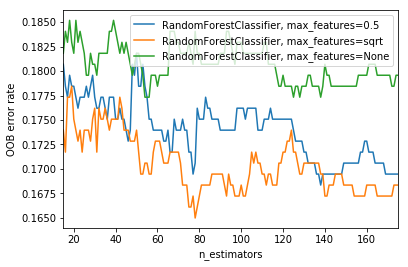

In [196]:
# Выводим зависимость качества от числа базовых моделей
for label, clf_err in error_rate_max_features.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Оптимальный значение max_features='sqrt'

# Выбираем оптимальное число итераций для GradientBoostingClassifier

57 0.407763035781


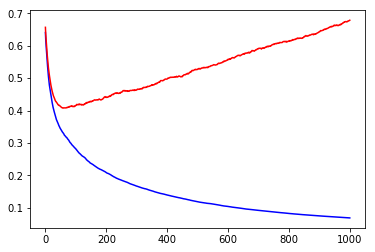

In [205]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Разбиваем выборку на обучение и тест
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, 
                                                        y_train,
                                                        test_size=0.33, 
                                                        random_state=42)


# Создаем класс модели градиентного бустинга
clf = GradientBoostingClassifier(n_estimators=1000, 
                                learning_rate= 0.05,
                                max_depth=6, 
                                subsample=0.75,
                                max_features='sqrt',
                                min_samples_leaf=9,
                                random_state=RANDOM_STATE)

# Обучаем модель на обучающей выборке
clf.fit(X_train_, y_train_)

test_score = np.zeros((clf.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict_proba(X_test_)):
    test_score[i] = log_loss(y_test_, y_pred)
    
train_score = np.zeros((clf.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict_proba(X_train_)):
    train_score[i] = log_loss(y_train_, y_pred)

# Находим оптимальное число итераций на тесте
print(np.argmin(test_score), np.min(test_score))

# Выводим зависимость качества от числа итераций
plt.plot(range(len(train_score)), train_score, 'b-',
         range(len(test_score)), test_score, 'r-')

Оптимальное число итераций 57

## Объединение моделей

In [206]:
# инициализирем модели с подобранными гиперпараметрами
rf_estimator = RandomForestClassifier(warm_start=True, 
                                    max_features='sqrt',
                                    max_depth=4,
                                    random_state=RANDOM_STATE)
gb_estimator = GradientBoostingClassifier(n_estimators=57, 
                                    learning_rate= 0.05,
                                    max_depth=5, 
                                    subsample=0.75,
                                    max_features='sqrt',
                                    min_samples_leaf=9,
                                    random_state=RANDOM_STATE)

In [207]:
# получаем предсказания вероятностей ансамблей на кросс-валидации для обучающей выборки
rf_train_pred = cross_val_predict_proba(rf_estimator, X_train, y_train)
gb_train_pred = cross_val_predict_proba(gb_estimator, X_train, y_train)

X_train_stack = np.stack([rf_train_pred[:,1], gb_train_pred[:,1]], axis=1)

In [208]:
# получаем предсказания ансамблей для тестовой выборки
rf_test_pred = rf_estimator.fit(X_train, y_train).predict_proba(X_test)
gb_test_pred = gb_estimator.fit(X_train, y_train).predict_proba(X_test)

X_test_stack = np.stack([rf_test_pred[:,1], gb_test_pred[:,1]], axis=1)

## Объединяем предсказания ансамблей с помощью логистической регрессии

In [209]:
from sklearn.linear_model import LogisticRegression

# TODO: подобрать гиперпараметры LogisticRegression

logreg = LogisticRegression(C=1.0,penalty='l2').fit(X_train_stack, y_train)
predicted_train = logreg.predict(X_train_stack)
predicted_test = logreg.predict(X_test_stack)

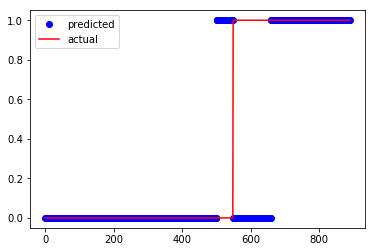

In [210]:
pairs = np.array(sorted(zip(y_train, predicted_train)))
plt.plot(range(0, len(pairs)), pairs[:, 1], 'bo',
         range(0, len(pairs)), pairs[:, 0], 'r-')

plt.legend(['predicted', 'actual'])
plt.show()

In [211]:
# Estimate model quality
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

print('accuracy: ', accuracy_score(y_train, predicted_train))
print('mse: ', mean_squared_error(y_train, predicted_train))

accuracy:  0.821548821549
mse:  0.178451178451


## Формируем файл для отправки

In [212]:
with open('submission.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(test['PassengerId'], predicted_test):
        out.write('%s,%s\n' % (passenger, y))